In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Import GridSearchCV libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score


In [2]:
df = pd.read_csv("vehicles_maindata.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'area'],
      dtype='object')

# DecisionTreeRegressor

In [4]:
# Select columns for prediction
df_analysis = df.loc[:,['price','year','odometer','type','area']]

In [6]:
df_analysis

,price,year,odometer,type,area
0,15000,2013-01-01,128000.0,truck,south
1,27990,2012-01-01,68696.0,pickup,south
2,34590,2016-01-01,29499.0,pickup,south
3,35000,2019-01-01,43000.0,truck,south
4,29990,2016-01-01,17302.0,pickup,south
...,...,...,...,...,...
103572,39990,2017-01-01,41664.0,other,west
103573,32990,2016-01-01,55612.0,other,west
103574,33590,2018-01-01,30814.0,sedan,west
103575,23590,2019-01-01,32226.0,sedan,west


In [7]:
# Create features and target
X = df_analysis.copy().drop('price', axis=1)
X = pd.get_dummies(X, columns=['year','type','area'])
y = df_analysis['price']

In [10]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [11]:
# Create a machine learning model
regr = DecisionTreeRegressor()

In [12]:
# Make an object pipe to create pipeline for regr
pipe = Pipeline(steps=[('regr',regr)])

In [14]:
# Set parameters as value list from which GridSearchCV will select best value
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [15]:
# Create dictionary to set parameters
parameters = dict(regr__max_depth=max_depth)

In [16]:
# Create GridSearchCV object and fot dataset i.e., X and y
pred = GridSearchCV(pipe, parameters)
pred.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('regr', DecisionTreeRegressor())]),
             param_grid={'regr__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                             12, 13, 14, 15]})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [17]:
# Print result
print(); print(pred.best_estimator_.get_params()['regr'])


DecisionTreeRegressor(max_depth=11)


In [18]:
# Make prediction
best_regr = DecisionTreeRegressor(max_depth=11)
best_regr.fit(X_train, y_train)
y_pred_11 = best_regr.predict(X_test)

In [19]:
# Result evaluation
rscore = metrics.r2_score(y_test, y_pred_11)
rscore

0.6761065847391461

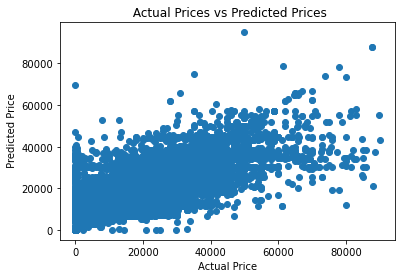

In [23]:
plt.scatter(y_test,y_pred_11)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [25]:
# Make prediction training 
best_regr = DecisionTreeRegressor(max_depth=11)
best_regr.fit(X_train, y_train)
y_train_pred_11 = best_regr.predict(X_train)

In [27]:
# Result evaluation
rscore = metrics.r2_score(y_train, y_train_pred_11)
rscore

0.7109879787046774

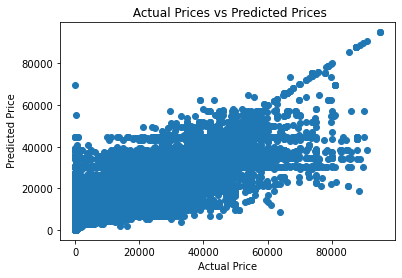

In [28]:
plt.scatter(y_train,y_train_pred_11)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [29]:
# Mean Square Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_11),
                mean_squared_error(y_test, y_pred_11)))

MSE train: 49628186.465, test: 56426310.754


In [30]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_11),
                r2_score(y_test, y_pred_11)))

R^2 train: 0.711, test: 0.676


In [20]:
# Test with max_depth 10
best_regr10 = DecisionTreeRegressor(max_depth=10)
best_regr.fit(X_train, y_train)
y_pred_10 = best_regr.predict(X_test)

In [21]:
rscore = metrics.r2_score(y_test, y_pred_10)
rscore

0.6760712502086764

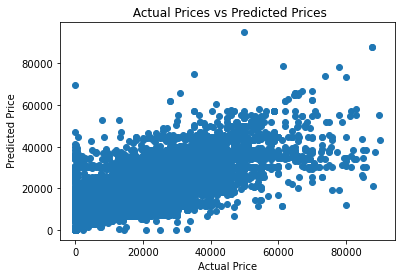

In [22]:
plt.scatter(y_test,y_pred_10)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
# Test with max_depth 10 training data
best_regr10 = DecisionTreeRegressor(max_depth=10)
best_regr.fit(X_train, y_train)
y_train_pred_10 = best_regr.predict(X_train)

In [32]:
rscore = metrics.r2_score(y_train, y_train_pred_10)
rscore

0.7109879787046774

In [34]:
# Mean Square Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_10),
                mean_squared_error(y_test, y_pred_10)))

MSE train: 49628186.465, test: 56432466.474


In [35]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_10),
                r2_score(y_test, y_pred_10)))

R^2 train: 0.711, test: 0.676


# Data selection for other Models

In [4]:
# Select columns for prediction
df_1 = df.loc[:,['price', 'year', 'manufacturer', 
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'area']]

In [5]:
df_1.info

<bound method DataFrame.info of         price        year manufacturer  condition  cylinders fuel  odometer  \
0       15000  2013-01-01         ford  excellent          6  gas  128000.0   
1       27990  2012-01-01          gmc       good          8  gas   68696.0   
2       34590  2016-01-01    chevrolet       good          6  gas   29499.0   
3       35000  2019-01-01       toyota  excellent          6  gas   43000.0   
4       29990  2016-01-01    chevrolet       good          6  gas   17302.0   
...       ...         ...          ...        ...        ...  ...       ...   
103572  39990  2017-01-01     infiniti       good          8  gas   41664.0   
103573  32990  2016-01-01     infiniti       good          8  gas   55612.0   
103574  33590  2018-01-01        lexus       good          6  gas   30814.0   
103575  23590  2019-01-01       nissan       good          6  gas   32226.0   
103576  28990  2018-01-01        lexus       good          6  gas   30112.0   

       title_status

In [6]:
# perform data transformation
for col in df_1.columns[1:]:
    attName = col
    dType = df[col].dtype
    missing = pd.isnull(df[col]).any()
    uniqueCount = len(df[attName].value_counts(normalize=False))
# discretize (create dummies)
    if dType == object:
        df_1 = pd.concat([df_1, pd.get_dummies(df_1[col], prefix=col)], axis=1)
        del df_1[attName]

In [7]:
df_1.head()

,price,cylinders,odometer,year_2001-01-01,year_2002-01-01,year_2003-01-01,year_2004-01-01,year_2005-01-01,year_2006-01-01,year_2007-01-01,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,area_mw,area_ne,area_south,area_west
0,15000,6,128000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,27990,8,68696.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,34590,6,29499.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,35000,6,43000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,29990,6,17302.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


#  KNeighborsRegressor

In [8]:
# Create features and target
X = df_1.copy().drop('price', axis=1)
X=pd.get_dummies(X)

# Create our target
y = df_1['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .1, random_state=2)

In [10]:
# Create model
neigh = KNeighborsRegressor()

In [11]:
# Fit model
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
# Predict test data
y_pred = neigh.predict(X_test)

In [13]:
# Result of prediction
data = {'price': y_test,
       'prediction': y_pred}
df_pred = pd.DataFrame(data)

In [14]:
df_pred

,price,prediction
3692,19900,10798.8
92885,4998,3824.6
7937,29990,29990.0
45589,51900,35373.8
92790,39590,39590.0
...,...,...
27879,12988,10786.8
43419,500,12198.6
87363,39999,41991.4
15131,1950,3740.0


In [15]:
# R squared Error
error_score = metrics.r2_score(y_test, y_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.6109782558130417


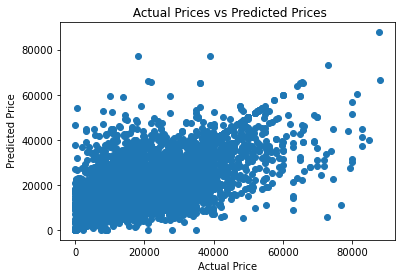

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [17]:
# Predict training data
y_train_pred = neigh.predict(X_train)

In [18]:
# R squared Error
error_score = metrics.r2_score(y_train, y_train_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.7680707504113622


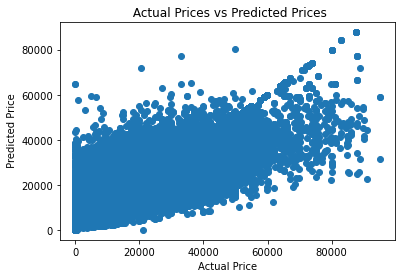

In [19]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [20]:
# Mean Square Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_pred)))

MSE train: 40053118.609, test: 65799438.348


In [21]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_pred)))

R^2 train: 0.768, test: 0.611


# Linear Regression Model

In [22]:
# Loadinf the Linear Regression model
lin_reg_model = LinearRegression()

In [23]:
#fitting data to the linear Regression model
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# prediction on Testing data
y_test_pred = lin_reg_model.predict(X_test)

In [25]:
# Checking Accuracy
# R squared Error
error_score = metrics.r2_score(y_test, y_test_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.753026984617314


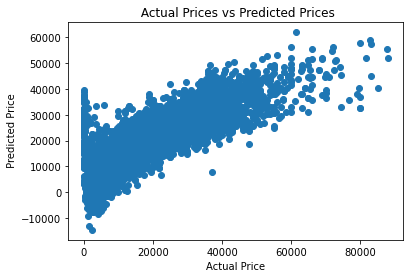

In [26]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
# prediction on Training data
y_train_pred = lin_reg_model.predict(X_train)

In [28]:
# R squared Error
error_score = metrics.r2_score(y_train, y_train_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.7571953794028752


In [29]:
# Result of prediction
data = {'price': y_train,
       'prediction': y_train_pred}
df_pred = pd.DataFrame(data)
df_pred

,price,prediction
9802,5975,4925.817926
7648,7738,8734.688404
57346,10500,9323.259828
70682,10995,8065.046444
101997,39995,31390.476265
...,...,...
44566,13999,17018.379972
95816,6895,10018.783069
72173,15800,21442.032086
100879,34590,31768.841207


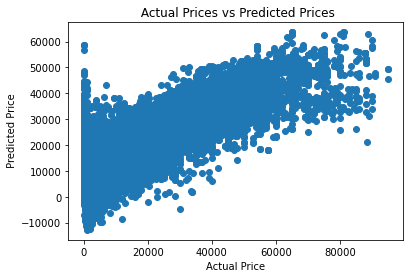

In [30]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
# Mean Square Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))

MSE train: 41931245.347, test: 41773206.619


In [32]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

R^2 train: 0.757, test: 0.753


# Lasso Regression Model

In [33]:
# Loadinf the Lasso Regression model
lass_reg_model = Lasso()

In [34]:
#fitting data to the linear Regression model
lass_reg_model.fit(X_train, y_train)

Lasso()

In [35]:
# prediction on Training data
y_train_pred = lass_reg_model.predict(X_train)

In [36]:
# R squared Error
error_score = metrics.r2_score(y_train, y_train_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.757057518923647


In [37]:
# Result of prediction
data = {'price': y_train,
       'prediction': y_train_pred}
df_pred = pd.DataFrame(data)
df_pred

,price,prediction
9802,5975,5061.657132
7648,7738,8713.136469
57346,10500,9349.909769
70682,10995,8060.235985
101997,39995,31369.073162
...,...,...
44566,13999,17012.851323
95816,6895,10058.900995
72173,15800,21022.002655
100879,34590,31767.821925


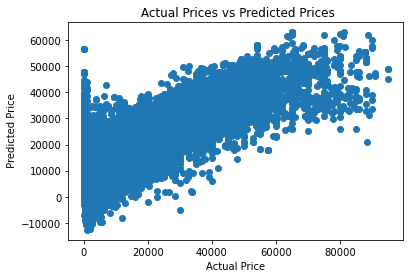

In [38]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [39]:
# prediction on Testing data
y_data_pred = lass_reg_model.predict(X_test)

In [40]:
# R squared Error
error_score = metrics.r2_score(y_test, y_test_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.753026984617314


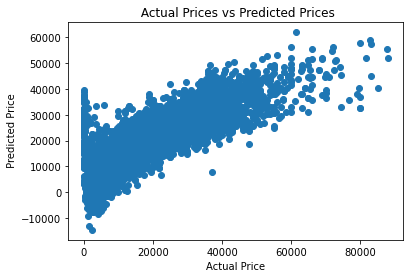

In [41]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [42]:
# Mean Square Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))

MSE train: 41955053.220, test: 41773206.619


In [43]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

R^2 train: 0.757, test: 0.753
